DOMAIN: Automobile

CONTEXT: The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes

PROJECT OBJECTIVE: Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’

# 1. Import and warehouse data:
Import all the given datasets and explore shape and size.<br>
• Merge all datasets onto one and explore final shape and size.<br>
• Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.<br>
• Import the data from above steps into python.

In [1]:
#import libraries that will be used for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix
#import warnings
#warnings.filterwarnings('ignore')

In [2]:
#Load the data from Json file
import json

P1 = json.load(open('Part1 - Car-Attributes.json'))
P1_Data = pd.DataFrame(P1)
P1_Data

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


In [3]:
P1_names = pd.read_csv('Part1 - Car name.csv')
P1_names

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


In [4]:
P1_Data = pd.concat([P1_Data, P1_names], axis = 1)
P1_Data.shape
#So now we have 398 observations with 9 different features

(398, 9)

In [5]:
P1_Data.to_csv("Part 1 - Automobile.csv" , index = False)

In [6]:
Automobile = pd.read_csv('Part 1 - Automobile.csv')

In [7]:
Automobile.shape

(398, 9)

# 2. Data cleansing:

• Missing/incorrect value treatment<br>
• Drop attribute/s if required using relevant functional knowledge<br>
• Perform another kind of corrections/treatment on the data.

In [8]:
#Lets have first look at the data
Automobile.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
Automobile.info()
#we have all non null columns but then HP being the numeric is displayed as object data type
#we have to get insights of the hp data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   mpg       398 non-null    float64
 1   cyl       398 non-null    int64  
 2   disp      398 non-null    float64
 3   hp        398 non-null    object 
 4   wt        398 non-null    int64  
 5   acc       398 non-null    float64
 6   yr        398 non-null    int64  
 7   origin    398 non-null    int64  
 8   car_name  398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [10]:
Automobile.describe(include = "all").T
#Clearly there are some non numeric data which needs to be take care of

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
mpg,398,NaN,NaN,NaN,23.5146,7.81598,9,17.5,23,29,46.6
cyl,398,NaN,NaN,NaN,5.45477,1.701,3,4,4,8,8
disp,398,NaN,NaN,NaN,193.426,104.27,68,104.25,148.5,262,455
hp,398,94,150,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wt,398,NaN,NaN,NaN,2970.42,846.842,1613,2223.75,2803.5,3608,5140
acc,398,NaN,NaN,NaN,15.5681,2.75769,8,13.825,15.5,17.175,24.8
yr,398,NaN,NaN,NaN,76.0101,3.69763,70,73,76,79,82
origin,398,NaN,NaN,NaN,1.57286,0.802055,1,1,1,2,3
car_name,398,305,ford pinto,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# isdigit()? on 'hp' 
hpIsDigit = pd.DataFrame(Automobile.hp.str.isdigit())  # if the string is made of digits store True else False

#print isDigit = False!
Automobile[hpIsDigit['hp'] == False]

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [12]:
# Missing values have a'?''
# Replace missing values with NaN
Automobile = Automobile.replace('?', np.nan)
Automobile[hpIsDigit['hp'] == False] 

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [13]:
Automobile['hp'].median() # note the mdedian of the hp column

93.5

In [14]:
Automobile.isnull().any() # check on all the feature contaning null values

mpg         False
cyl         False
disp        False
hp           True
wt          False
acc         False
yr          False
origin      False
car_name    False
dtype: bool

In [15]:
# Since we have only hp column with Null values,we can fill out NA values with median of hp
Automobile = Automobile.fillna(Automobile['hp'].median())
Automobile[hpIsDigit['hp'] == False] 

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_name
32,25.0,4,98.0,93.5,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,93.5,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,93.5,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,93.5,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,93.5,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,93.5,3035,20.5,82,1,amc concord dl


In [16]:
Automobile.isnull().any() # Rechek for NULL values in any columns

mpg         False
cyl         False
disp        False
hp          False
wt          False
acc         False
yr          False
origin      False
car_name    False
dtype: bool

In [17]:
Automobile['hp'] = Automobile['hp'].astype('float64')  # converting the hp column from object / string type to float

In [18]:
#Looking at the data we can say that car name is not usefull to achive our objective,
#Hence we can drop the car name column
Automobile = Automobile.drop('car_name', axis = 1)
Automobile.shape #confirmation on car_name column is dropped

(398, 8)

In [19]:
#SInce we have analysed and understood the data distribution, 
#now lets logically manipulate the data for better unerstandability
#Year as a column can be replaced with the Age of the car column which inturn will give better understandability of the data
Automobile['age'] = 83 - Automobile['yr']
Automobile['age'].describe()

count    398.000000
mean       6.989950
std        3.697627
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       13.000000
Name: age, dtype: float64

In [20]:
# we can drop the yr column now
Automobile = Automobile.drop('yr', axis = 1)
Automobile.head() #confirmation on car_name column is dropped

,mpg,cyl,disp,hp,wt,acc,origin,age
0,18.0,8,307.0,130.0,3504,12.0,1,13
1,15.0,8,350.0,165.0,3693,11.5,1,13
2,18.0,8,318.0,150.0,3436,11.0,1,13
3,16.0,8,304.0,150.0,3433,12.0,1,13
4,17.0,8,302.0,140.0,3449,10.5,1,13


# Data analysis & visualisation:

• Perform detailed statistical analysis on the data.<br>
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

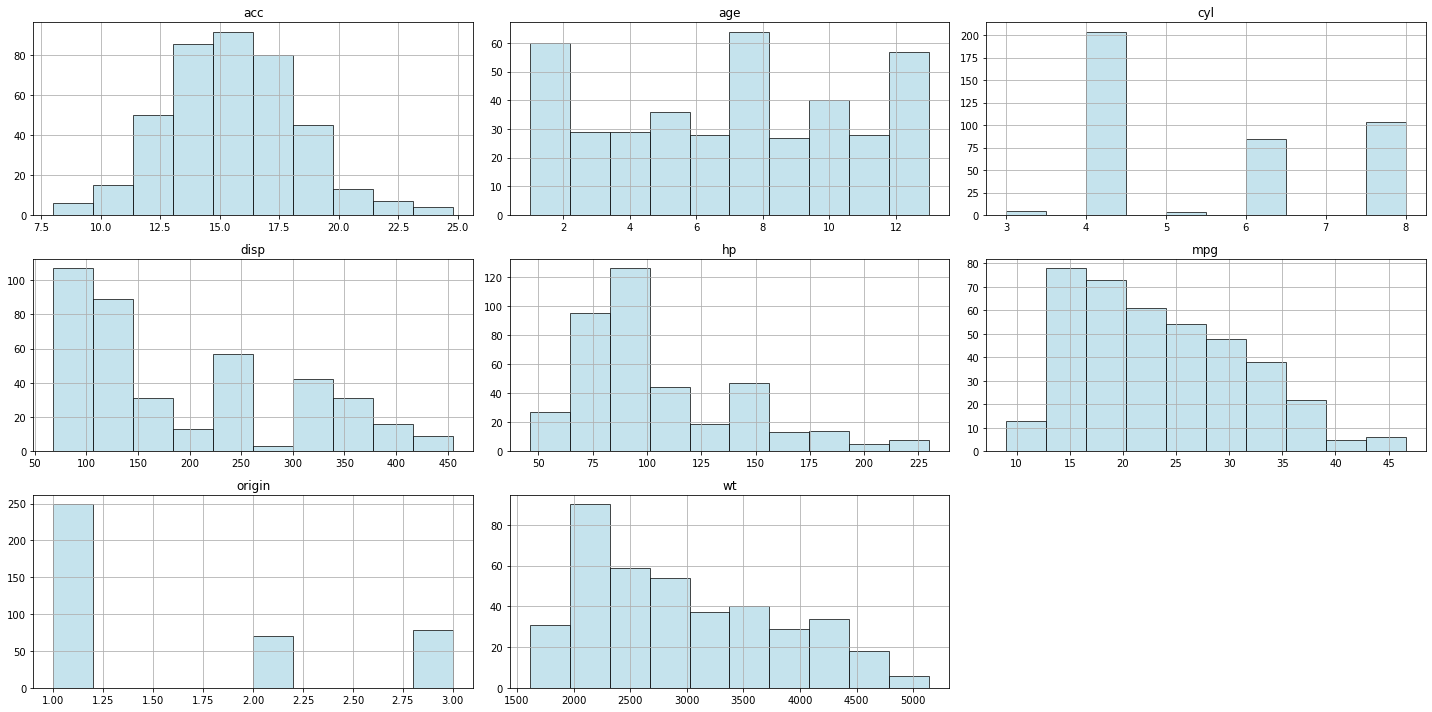

In [21]:
#Lets check the distribution of each feature
Automobile.hist(color='lightblue', edgecolor = 'black', alpha = 0.7, figsize = (20,10), layout=(3,3))
plt.tight_layout()
plt.show()
# We can see onlt acc feature is normally distributed

In [22]:
# For Skewness, closer the value to 0, perfectly the distribution follows normal distribution
#negative skew: The left tail is longer; the mass of the distribution is concentrated on the right of the figure.
#positive skew: The right tail is longer; the mass of the distribution is concentrated on the left of the figure.
Automobile.skew()

#We can infer that distribution is quite good as we dont have any extreme skewed distribution except for horsepower 

mpg       0.457066
cyl       0.526922
disp      0.719645
hp        1.106224
wt        0.531063
acc       0.278777
origin    0.923776
age      -0.011535
dtype: float64

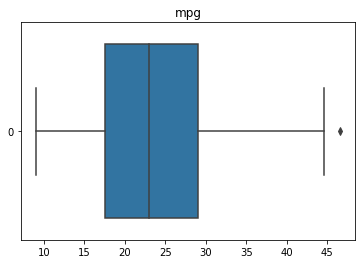

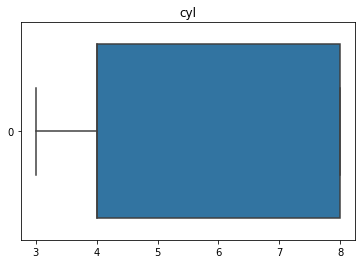

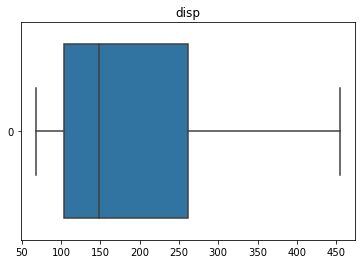

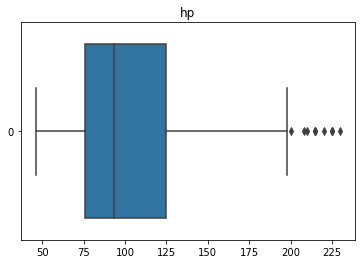

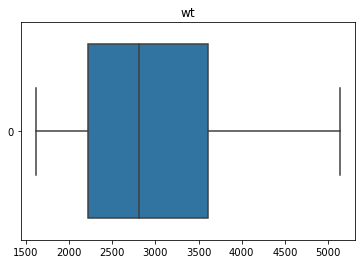

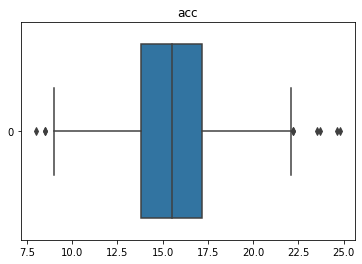

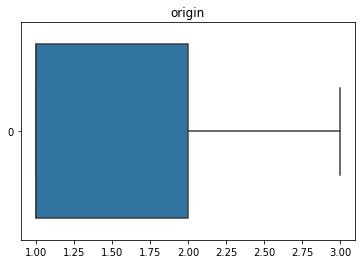

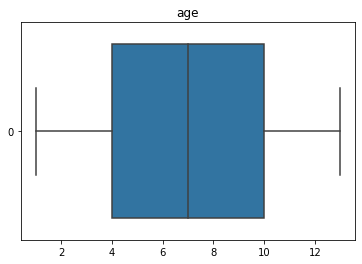

In [23]:
#Lets cehck the presence of outliers in the data set
for columns in Automobile:
    plt.figure()
    plt.title(columns)
    sns.boxplot(data = Automobile[columns], orient="h")

# We can observe that Milage, horsepower and acceleration have presence of outliers 
# Presence of ouliers will impact clustering models because of its extreme outlying distance from the distribution

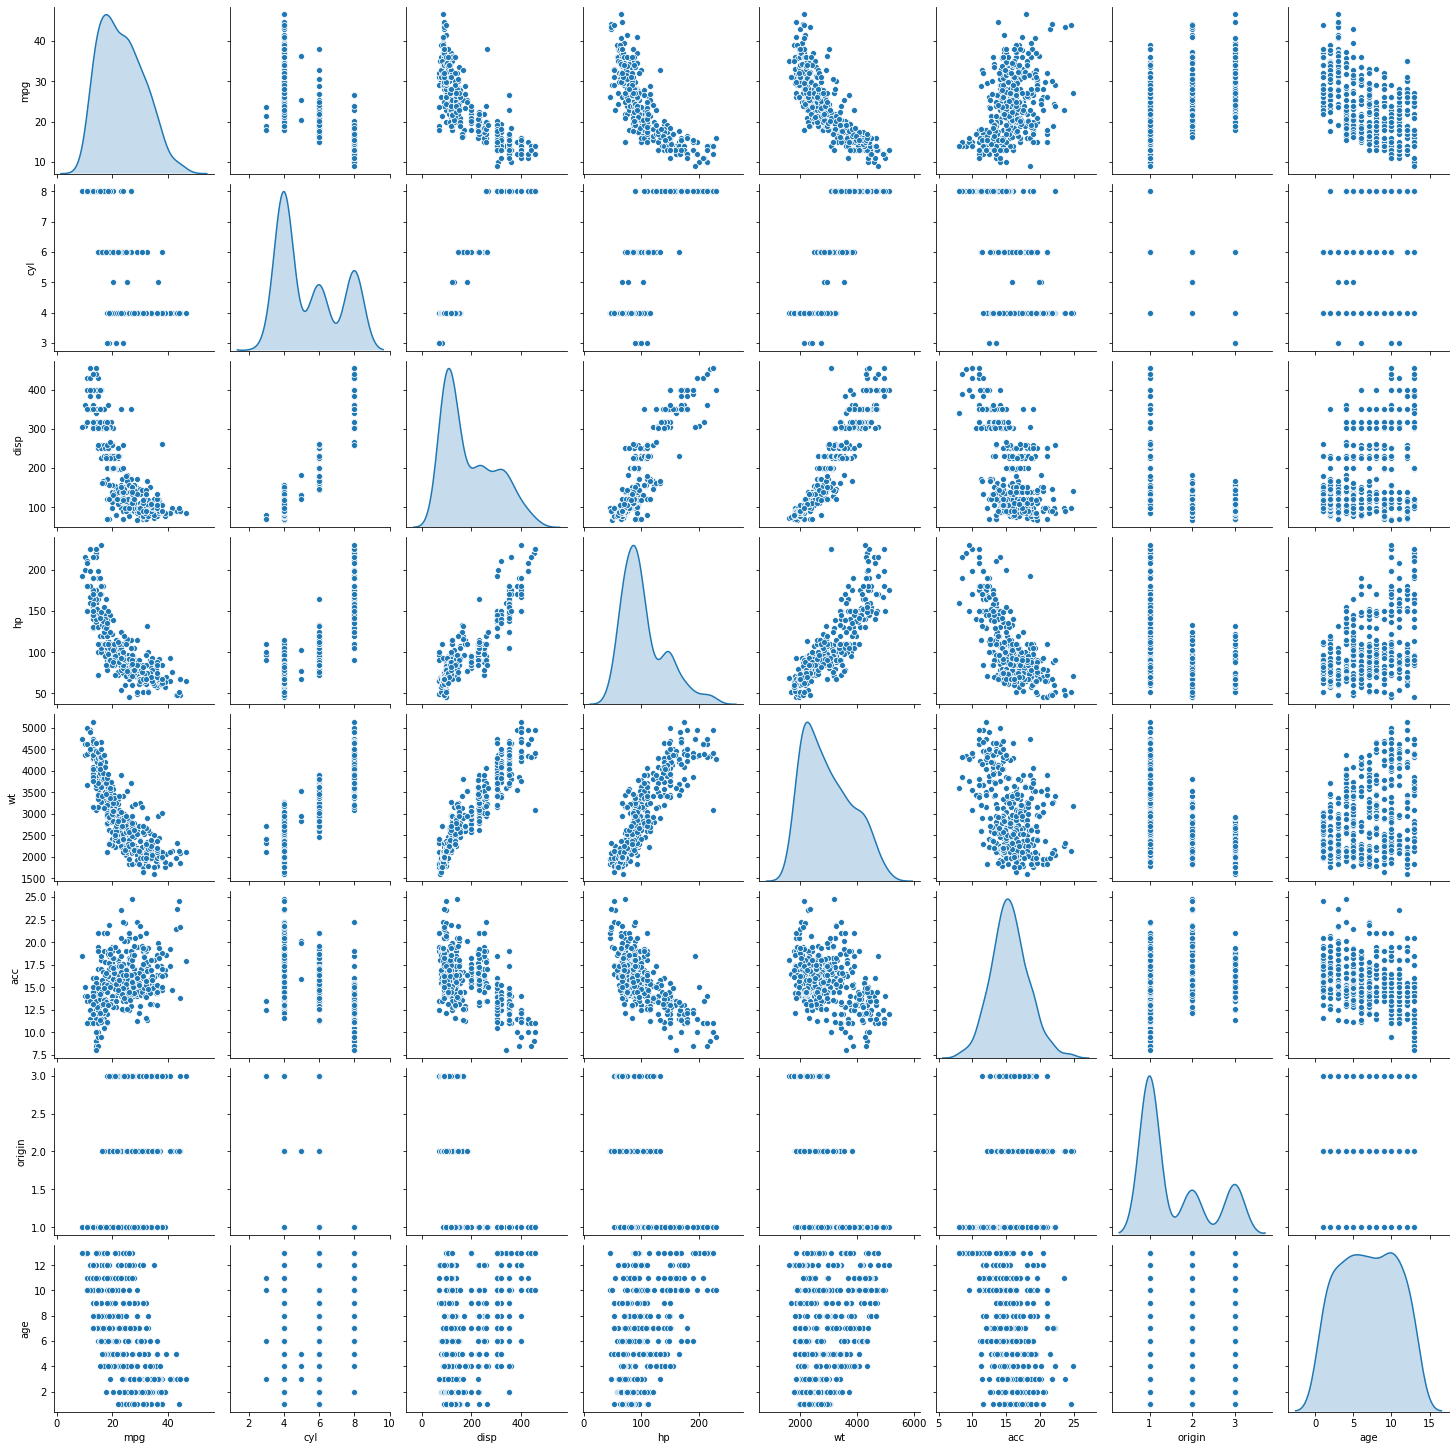

In [24]:
sns.pairplot(Automobile , diag_kind='kde')
#From this single visual representation we can make infrences on univariate and bivariate distributions

In [25]:
# pairplot can be used as a one place to analyse entre data distribution and correlation
# From above we can see that individual distribution is near to normal distribution for most of the features
# except for Origin and cylinders.
# From above we can also infer that based on the distribution curves, we can have probably 3 clusters under this data set
# correlation of milage follows negative slope with displacement, horsepower and weight 
# which means Milage starts reducing with increase in these 3 values

In [26]:
Automobile.corr()
# As per our previous assumption,
# we have negative correlation between milage and (displacement, horsepower, weight, cylnders)

,mpg,cyl,disp,hp,wt,acc,origin,age
mpg,1.000000,-0.775396,-0.804203,-0.773453,-0.831741,0.420289,0.563450,-0.579267
cyl,-0.775396,1.000000,0.950721,0.841284,0.896017,-0.505419,-0.562543,0.348746
disp,-0.804203,0.950721,1.000000,0.895778,0.932824,-0.543684,-0.609409,0.370164
hp,-0.773453,0.841284,0.895778,1.000000,0.862442,-0.686590,-0.452096,0.413733
wt,-0.831741,0.896017,0.932824,0.862442,1.000000,-0.417457,-0.581024,0.306564
acc,0.420289,-0.505419,-0.543684,-0.686590,-0.417457,1.000000,0.205873,-0.288137
origin,0.563450,-0.562543,-0.609409,-0.452096,-0.581024,0.205873,1.000000,-0.180662
age,-0.579267,0.348746,0.370164,0.413733,0.306564,-0.288137,-0.180662,1.000000


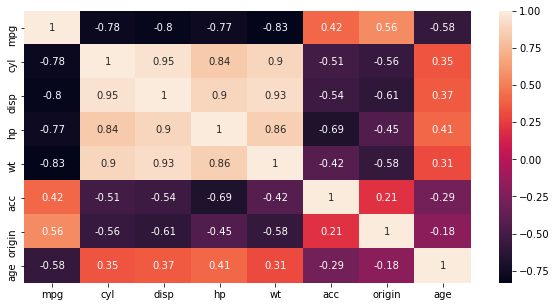

In [27]:
#Visual representation of above correlation 
plt.figure(figsize = (10,5))
sns.heatmap(Automobile.corr(), annot = True)
# From below we can infer that a car's Milage will reduce when numebr of cylinders, displacement ,
# horsepower and weight of the vechical increases
#however positive correlation among year and origin needs to be we understood

In [28]:
#If the objective of our project was just to cluster the data, we might prefer fixing outliers with below 

#Take logaritmic transform for Milage, horsepower and acceleration to remove outliers so that 
# impact on centroids can be minimized

#Automobile['hp'] = np.log(Automobile['hp'])
#Automobile['acc'] = np.log(Automobile['acc'])
#Automobile['mpg'] = np.log(Automobile['mpg'])

#Automobile.describe().T

# Machine learning:
• Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.<br>
• Share your insights about the difference in using these two methods.

# Creating cluster based on K means technique

In [29]:
#Before we start creating clusters, lets scale the data
Automobile_sc = Automobile.apply(zscore)
Automobile_sc.head()

,mpg,cyl,disp,hp,wt,acc,origin,age
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.715145,1.627426
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-0.715145,1.627426
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.715145,1.627426
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.715145,1.627426
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.715145,1.627426


In [30]:
# Variables are now scaled. Let us now try to create clusters
#import library for K means
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

cluster_errors = []
silhouette_value = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(Automobile_sc)
    labels = kmeans.labels_
    cluster_errors.append(kmeans.inertia_)
    if i > 1:
        silhouette_value.append(silhouette_score(Automobile_sc,labels))
    else:
        silhouette_value.append(1)



kmean_df = pd.DataFrame({"Number of cluster": range(1,10), "Cluster Iniertia": cluster_errors, "Silhouette score": silhouette_value})
kmean_df


#From below  it is clearly visible that after CLuster 4 Silhouete score bounces back hence we can opt for 4 Clsuter

,Number of cluster,Cluster Iniertia,Silhouette score
0,1,3184.000000,1.000000
1,2,1588.592457,0.414892
2,3,1190.043653,0.324667
3,4,987.943167,0.312349
4,5,829.715787,0.332970
5,6,750.873793,0.336522
6,7,680.796515,0.294829
7,8,633.379675,0.287554
8,9,594.943596,0.266596


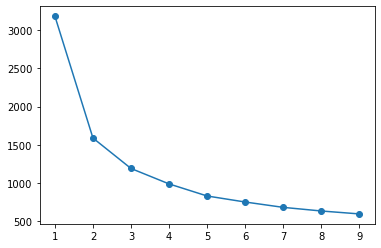

In [31]:
# Another way of finding ideal K value is using elbow method
plt.plot(range(1,10), cluster_errors, marker = "o")

# Following the elbow method, below representations we can see that 
#after 3 clusters we dont see big shift in the error level when moving gradually towards higher number of clusters. 
# after Looking at both the methods, we can consider K = 4 clusters as per above mentioned silhouette observation

# Creating CLuster based on hirarchical clustering technique

In [32]:
# Lets find which linkage method we can choose for using HIrarchical clustering for our given data set

from scipy.cluster.hierarchy import cophenet, linkage
from scipy.spatial.distance import pdist 

# cophenet index is a measure of the correlation between the distance of points in feature space
# closer it is to 1, the better is the clustering
# we will see for these linkage methods "single","complete","centroid","average","ward"

Z = linkage(Automobile_sc, metric='euclidean', method='single')
c, coph_dists = cophenet(Z , pdist(Automobile_sc))
print("Cophenetic correlation for given data set with Single linkage method is:" , c)

Z = linkage(Automobile_sc, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(Automobile_sc))
print("Cophenetic correlation for given data set with complete linkage method is:" , c)

Z = linkage(Automobile_sc, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(Automobile_sc))
print("Cophenetic correlation for given data set with average linkage method is:" , c)

Z = linkage(Automobile_sc, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(Automobile_sc))
print("Cophenetic correlation for given data set with ward linkage method is:" , c)


Cophenetic correlation for given data set with Single linkage method is: 0.5581756271482968
Cophenetic correlation for given data set with complete linkage method is: 0.723784736927783
Cophenetic correlation for given data set with average linkage method is: 0.7554096381782244
Cophenetic correlation for given data set with ward linkage method is: 0.681505889742128


In [33]:
#Based on above, we can see that average linkage method gives the better results hence we can go for that method

In [34]:
# Importing necesary library 
from sklearn.cluster import AgglomerativeClustering 
HC_errors = []

for i in range (1,10):
    HCmodel = AgglomerativeClustering(n_clusters=i, affinity='euclidean',  linkage='complete')
    HCmodel.fit(Automobile_sc)
    labels = HCmodel.labels_
    if i > 1:
        HC_errors.append(silhouette_score(Automobile_sc,labels))
    else:
        HC_errors.append(1)
    
print("Silhouette coefficient for Hirarchical clustering technique with cluster 1 to 10 is: \n")
HC_errors
#From below  it is clearly visible that after CLuster 5 Silhouete score bounces back  and increases
#hence we can opt for 5 Clsuter based on Silhouette score

Silhouette coefficient for Hirarchical clustering technique with cluster 1 to 10 is: 



[1,
 0.43968084062736096,
 0.26177521523453273,
 0.1932747725335333,
 0.18928061333444235,
 0.2146451164413301,
 0.2199570632773293,
 0.23211860697140704,
 0.20182701481898288]

### Insights:

By using both K mean and Hirarchical clustering methods, it is a challenge to determine the correct number of clusters we will requrie for the data set.<br>
As per the visual representation (spikes in pairplot )3  clsuters is what we inferred but then with K mean silhouette coefficients, 4 clusters will be the optimal number of clusters<br>
With Hirarchical clustering technique its either by just looking at Dendogram for deciding the number of clusters or by silhouette coefficients results, in our case 5 clusters.

For this data, lets go ahead with K mean clusters and make individual cluster  inferences

# 5. Answer below questions based on outcomes of using ML based methods.
• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.<br>
• Use linear regression model on different clusters separately and print the coefficients of the models individually<br>
• How using different models for different clusters will be helpful in this case and how it will be different than using one single model without<br>
clustering? Mention how it impacts performance and prediction.

In [35]:
# Based on above inference lets create kmean with 4 clusters
kmeans = KMeans(n_clusters = 4)
kmeans.fit(Automobile_sc)
labels = kmeans.labels_

In [36]:
#Adding the labels into our orginal data set
Automobile['Cluster4'] = labels
Automobile.head()

,mpg,cyl,disp,hp,wt,acc,origin,age,Cluster4
0,18.0,8,307.0,130.0,3504,12.0,1,13,1
1,15.0,8,350.0,165.0,3693,11.5,1,13,1
2,18.0,8,318.0,150.0,3436,11.0,1,13,1
3,16.0,8,304.0,150.0,3433,12.0,1,13,1
4,17.0,8,302.0,140.0,3449,10.5,1,13,1


In [37]:
#Lets check the individual group wise average values for each feature
temp_Automobile = Automobile.groupby(['Cluster4'])
print("Total data in each cluster")
temp_Automobile.count()
#Data in each clsuter is fairly distributed

Total data in each cluster


,mpg,cyl,disp,hp,wt,acc,origin,age
Cluster4,,,,,,,,
0,110,110,110,110,110,110,110,110
1,95,95,95,95,95,95,95,95
2,99,99,99,99,99,99,99,99
3,94,94,94,94,94,94,94,94


In [38]:
print("Average data in each cluster")
temp_Automobile.mean()

Average data in each cluster


,mpg,cyl,disp,hp,wt,acc,origin,age
Cluster4,,,,,,,,
0,33.001818,4.090909,111.618182,76.190909,2307.372727,16.493636,2.045455,2.854545
1,14.469474,8.000000,349.705263,162.105263,4154.526316,12.604211,1.000000,9.473684
2,25.049495,4.040404,107.974747,83.510101,2325.656566,16.418182,2.101010,9.373737
3,19.937234,5.968085,221.212766,100.686170,3228.702128,16.585106,1.042553,6.808511


WE can see that all the clusters are very close to each other based on <br>
Cluster 0(mpg 19): car with average age, cylinders, horsepower gives moderate milage <br> 
Cluster 1(mpg 14): with more number of cylinders we can se that Milage is reduced <br>
Cluster 2(mpg 33): New car gives more milage then older ones <br>
Cluster 3(mpg 25): with reduced weight and cylinders even if the Car's age is more, we can expect the milage to be pretty good at around 25 mpg <br>
Also we can infer that Origin from base 2 tend to give more milage then Origin 1 cars


In [39]:
#Adding the labels into our orginal data set
Automobile_sc['Cluster4'] = labels
Automobile_sc.head()

,mpg,cyl,disp,hp,wt,acc,origin,age,Cluster4
0,-0.706439,1.498191,1.090604,0.673118,0.630870,-1.295498,-0.715145,1.627426,1
1,-1.090751,1.498191,1.503514,1.589958,0.854333,-1.477038,-0.715145,1.627426,1
2,-0.706439,1.498191,1.196232,1.197027,0.550470,-1.658577,-0.715145,1.627426,1
3,-0.962647,1.498191,1.061796,1.197027,0.546923,-1.295498,-0.715145,1.627426,1
4,-0.834543,1.498191,1.042591,0.935072,0.565841,-1.840117,-0.715145,1.627426,1


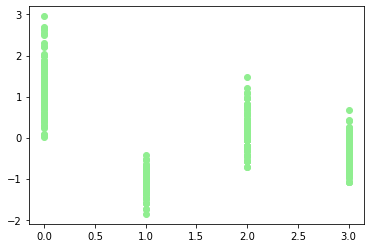

In [40]:
plt.scatter(Automobile_sc['Cluster4'],Automobile_sc['mpg'], color = ['Lightgreen'])
#We can observe that all the clusters overlap each other to considerable extent,
# Hence it is justifis that it will be difficult for a model to perform with high accuracy

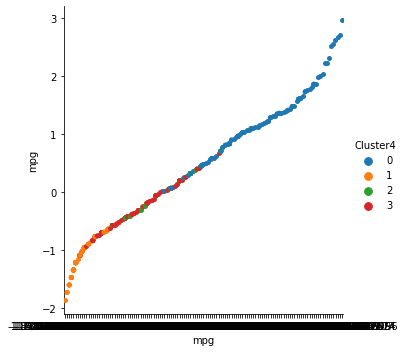

In [41]:
sns.catplot(x='mpg', y = 'mpg', data = Automobile_sc, hue = 'Cluster4')
#Anoter way of representing mpg data across all 4 clusters, we can see that cluster 2 iscomplete overlap under all three clusters

In [42]:
#Creating model on original dataset
x_sc = Automobile_sc.drop('mpg', axis = 1)
y_sc = Automobile_sc['mpg']
x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(x_sc, y_sc, test_size=0.30, random_state=1)

In [43]:
#creating Liner regression on entire dataset
from sklearn.linear_model import LinearRegression
LR_model_sc = LinearRegression()

LR_model_sc.fit(x_train_sc, y_train_sc)
print("Performance of Linear regression model on cluster 0 is:", LR_model_sc.score(x_test_sc,y_test_sc))
print("\nCoefficient of Linear regression model on cluster 0 is: \n", LR_model_sc.coef_)

# we can see that wihtout tuning our model is able to perform with accuracy of 58%, 
# now lets find how model performs on individual clusters

Performance of Linear regression model on cluster 0 is: 0.8682479471716251

Coefficient of Linear regression model on cluster 0 is: 
 [-0.04343333  0.23041616 -0.25056142 -0.60999406  0.06361994  0.07387761
 -0.22115701 -0.26327409]


In [44]:
#Create different data set based on clusters to run liner regresison on each data set
cl0 = Automobile_sc.loc[Automobile_sc['Cluster4']== 0]
cl1 = Automobile_sc.loc[Automobile_sc['Cluster4']== 1]
cl2 = Automobile_sc.loc[Automobile_sc['Cluster4']== 2]
cl3 = Automobile_sc.loc[Automobile_sc['Cluster4']== 3]

In [45]:
#Create x and y data set for each cluster data

Xcl0 =cl0.drop(['mpg'], axis=1)
ycl0 = cl0[['mpg']]

Xcl1 =cl1.drop(['mpg'], axis=1)
ycl1 = cl1[['mpg']]

Xcl2 =cl2.drop(['mpg'], axis=1)
ycl2 = cl2[['mpg']]

Xcl3 =cl3.drop(['mpg'], axis=1)
ycl3 = cl3[['mpg']]

In [46]:
#Create training and testing data set for each cluster with 70:30 ratio
X_train_cl0, X_test_cl0, y_train_cl0, y_test_cl0 = train_test_split(Xcl0, ycl0, test_size=0.30, random_state=1)
X_train_cl1, X_test_cl1, y_train_cl1, y_test_cl1 = train_test_split(Xcl1, ycl1, test_size=0.30, random_state=1)
X_train_cl2, X_test_cl2, y_train_cl2, y_test_cl2 = train_test_split(Xcl2, ycl2, test_size=0.30, random_state=1)
X_train_cl3, X_test_cl3, y_train_cl3, y_test_cl3 = train_test_split(Xcl3, ycl3, test_size=0.30, random_state=1)


In [47]:
#creating Liner regression on each cluster
from sklearn.linear_model import LinearRegression

LR_model_cl0 = LinearRegression()
LR_model_cl1 = LinearRegression()
LR_model_cl2 = LinearRegression()
LR_model_cl3 = LinearRegression()

LR_model_cl0.fit(X_train_cl0, y_train_cl0)
print("\Performance of Linear regression model on cluster 0 is:", LR_model_cl0.score(X_test_cl0,y_test_cl0))
print("\nCoefficient of Linear regression model on cluster 0 is: \n", LR_model_cl0.coef_)

\Performance of Linear regression model on cluster 0 is: 0.4850718791801967

Coefficient of Linear regression model on cluster 0 is: 
 [[ 0.28766827  0.4985276  -0.34361327 -1.05717264  0.15869053  0.0533829
  -0.37980969  0.        ]]


In [48]:
LR_model_cl1.fit(X_train_cl1, y_train_cl1)
print("\Performance of Linear regression model on cluster 0 is:", LR_model_cl1.score(X_test_cl1,y_test_cl1))
print("\nCoefficient of Linear regression model on cluster 1 is: \n", LR_model_cl1.coef_)

\Performance of Linear regression model on cluster 0 is: 0.39057409427748435

Coefficient of Linear regression model on cluster 1 is: 
 [[-1.14916755e+11  2.75854716e-02 -1.58169608e-01 -1.66760462e-01
  -1.52875649e-01  2.87706251e+10 -1.64182441e-01  0.00000000e+00]]


In [49]:
LR_model_cl2.fit(X_train_cl2, y_train_cl2)
print("\Performance of Linear regression model on cluster 0 is:", LR_model_cl2.score(X_test_cl2,y_test_cl2))
print("\nCoefficient of Linear regression model on cluster 2 is: \n", LR_model_cl2.coef_)

\Performance of Linear regression model on cluster 0 is: 0.6822006536408214

Coefficient of Linear regression model on cluster 2 is: 
 [[ 0.31280444 -0.27960158 -0.45011516 -0.55717623 -0.113109    0.02258894
  -0.05754112  0.        ]]


In [50]:

LR_model_cl3.fit(X_train_cl3, y_train_cl3)
print("\Performance of Linear regression model on cluster 0 is:", LR_model_cl3.score(X_test_cl3,y_test_cl3))
print("\nCoefficient of Linear regression model on cluster 3 is: \n", LR_model_cl3.coef_)

\Performance of Linear regression model on cluster 0 is: -0.29255434433900374

Coefficient of Linear regression model on cluster 3 is: 
 [[ 0.09596191 -0.36076751  0.24019658 -0.40566465 -0.01596469 -0.54765141
  -0.20763181  0.        ]]


From Above we can see that model performance is different for different clusters which can be fine tuned further for better model performance by using different models for different clusters.


So when the new observation of the car comes in, we can identify which cluster it belongs to and then accordignly realize what will be its probable average milage per galon. Just by looking at the feature values we can make a guess that which particular car will fall in which particular cluster that simply concludes that by using clustering we can get better insights and  understanding of the data and the features


For better analysis in future, company can update the features like year to age
incase of descrete varaibles, if possible standard format of one hot encoding should be followed for better model performances

